# NYC Taxi data in Winter and Summer

Refer to the [Data dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf) to learn more about the columns that have been provided.


In [ ]:
#Install the pandas library
!pip install pandas

In [11]:
import pandas as pd
import numpy as np
path = '../../data/taxi.csv'

#Load the csv file into a dataframe
df = pd.read_csv(path)

#Print the dataframe
print(df.head())


   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2019-07-15 16:27:53   2019-07-15 16:44:21              3.0   
1       2.0  2019-07-17 20:26:35   2019-07-17 20:40:09              6.0   
2       2.0  2019-07-06 16:01:08   2019-07-06 16:10:25              1.0   
3       1.0  2019-07-18 22:32:23   2019-07-18 22:35:08              1.0   
4       2.0  2019-07-19 14:54:29   2019-07-19 15:19:08              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.02         1.0                  N           186           233   
1           1.59         1.0                  N           141           161   
2           1.69         1.0                  N           246           249   
3           0.90         1.0                  N           229           141   
4           4.79         1.0                  N           237           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \


# Use the cells below to do your own Exploratory Data Analysis

Note that, according to the author of the data set:
| Field Name              | Description                                                                 |
|-------------------------|-----------------------------------------------------------------------------|
| VendorID                | A code indicating the TPEP provider that provided the record.                |
|                         | - 1 = Creative Mobile Technologies, LLC                                       |
|                         | - 2 = VeriFone Inc.                                                          |
| tpep_pickup_datetime    | The date and time when the meter was engaged.                                |
| tpep_dropoff_datetime   | The date and time when the meter was disengaged.                             |
| Passenger_count         | The number of passengers in the vehicle.                                      |
|                         | - This is a driver-entered value.                                            |
| Trip_distance           | The elapsed trip distance in miles reported by the taximeter.                |
| PULocationID            | TLC Taxi Zone in which the taximeter was engaged.                            |
| DOLocationID            | TLC Taxi Zone in which the taximeter was disengaged.                         |
| RateCodeID              | The final rate code in effect at the end of the trip.                        |
|                         | - 1 = Standard rate                                                          |
|                         | - 2 = JFK                                                                    |
|                         | - 3 = Newark                                                                 |
|                         | - 4 = Nassau or Westchester                                                  |
|                         | - 5 = Negotiated fare                                                        |
|                         | - 6 = Group ride                                                             |
| Store_and_fwd_flag      | Indicates whether the trip record was held in vehicle memory ("store and forward"). |
|                         | - Y = store and forward trip                                                 |
|                         | - N = not a store and forward trip                                           |
| Payment_type            | A numeric code signifying how the passenger paid for the trip.               |
|                         | - 1 = Credit card                                                            |
|                         | - 2 = Cash                                                                   |
|                         | - 3 = No charge                                                              |
|                         | - 4 = Dispute                                                                |
|                         | - 5 = Unknown                                                                |
|                         | - 6 = Voided trip                                                            |
| Fare_amount             | The time-and-distance fare calculated by the meter.                          |
| Extra                   | Miscellaneous extras and surcharges.                                         |
| MTA_tax                 | $0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| Improvement_surcharge   | $0.30 improvement surcharge assessed trips at the flag drop.                 |
| Tip_amount              | Tip amount – This field is automatically populated for credit card tips.     |
| Tolls_amount            | Total amount of all tolls paid in the trip.                                  |
| Total_amount            | The total amount charged to passengers.                                      |
| Congestion_surcharge    | Total amount collected in the trip for NYS congestion surcharge.             |
| Airport_fee             | $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.            |

## Other Factors That Could Influence the Tip Amount
We already investigated whether the seasons (specifically Summer and Winter) influences the tip amount of the taxi passengers. Unfortunately, through hypothesis testing, we did not find any significant evidence that there are difference in the tip amount between Summer and Winter.

### Correlation Matrix
The correlation matrix shows the correlation between each pair of variables in the dataset. This is only applicable to quantitative variables, hence, we should filter the dataset with numerical variables only.




In [10]:
# Filter columns with numerical data
numerical_columns = df.select_dtypes(include=[np.number]).columns

corr_coeff_tip = df[numerical_columns].corr()["tip_amount"]
print(f"Correlation Coefficients for Tip Amount:\n{corr_coeff_tip}")

Correlation Coefficients for Tip Amount:
VendorID                -0.030959
passenger_count         -0.153648
trip_distance            0.429868
RatecodeID               0.215518
PULocationID             0.012450
DOLocationID            -0.116119
payment_type            -0.556120
fare_amount              0.358010
extra                   -0.021356
mta_tax                 -0.092585
tip_amount               1.000000
tolls_amount             0.412701
improvement_surcharge         NaN
total_amount             0.494920
congestion_surcharge     0.036613
Name: tip_amount, dtype: float64




Hence, we know that the following columns are suitable for inclusion in a correlation analysis with "Tip_amount":

**Passenger_count:** This could potentially correlate with the tip amount, as larger groups might tend to tip differently than smaller groups.

**Trip_distance**: The distance traveled could influence the tip amount, as longer trips might lead to higher tips.

**Fare_amount**: The fare calculated by the meter could also be correlated with the tip amount.

**Extra**: Miscellaneous extras and surcharges could potentially affect the overall payment, including the tip.

**Tolls_amount**: Total tolls paid during the trip might also correlate with the total amount paid by passengers, including tips.
We will investigate the other numerical variables later.

### Investigating the correlation matrix
We can see that the trip_distance, fare_amount, and total_amount are positively correlated with the tip_amount. 

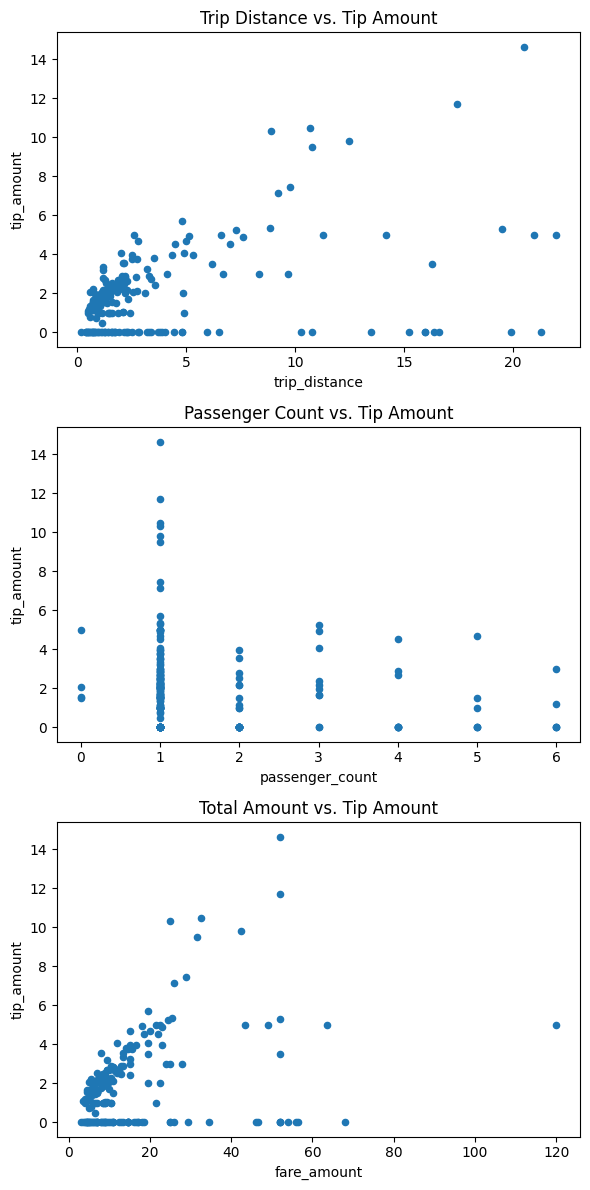

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, figsize=(6, 12))

df.plot(x="trip_distance", y="tip_amount", kind="scatter", ax=axs[0])
axs[0].set_title("Trip Distance vs. Tip Amount")

df.plot(x="passenger_count", y="tip_amount", kind="scatter", ax=axs[1])
axs[1].set_title("Passenger Count vs. Tip Amount")

df.plot(x="fare_amount", y="tip_amount", kind="scatter", ax=axs[2])
axs[2].set_title("Total Amount vs. Tip Amount")

plt.tight_layout()
plt.show()

From the graph, we cant really see a clear positive linear trend against the tip amount. Thus, from the plots, it is not clear to us whether there is a significant influence from the tip amount

## Columns that are most likely to not influence the tip amount

As we can see from the data set, fixed charges like MTA tax, improvement surcharge, and congestion surcharge do not affect the tip amount. They fall under numerical continuous variables.

Other columns that does not directly influence or is not helpful in answering the client's queestion about the tip amount are store_and_fwd_flag and Payment Type. The reasonthat Payment Type does not help us is because the tip amount are only . They fall under ategorical variables.


To determine which columns might not be needed to answer a client's specific questions about the NYC TLC Trip Records (Yellow Taxi) dataset, we can consider the typical focus areas of inquiry related to taxi trips and passenger behavior. Here are some columns that might be less relevant depending on the specific questions being addressed:

VendorID: Unless the analysis involves differences between TPEP providers, this column may not be directly relevant to many client queries.

Store_and_fwd_flag: This flag indicates whether a trip record was stored in the vehicle before being sent to the vendor due to a lack of server connection. It might not be necessary unless investigating specific technical issues or data transmission reliability.

RateCodeID: While useful for understanding the fare structure, if the analysis focuses solely on tip amounts or trip expenses, this column may be less critical.

MTA_tax: This fixed tax amount might not be directly relevant to analyses focusing strictly on passenger behaviors such as tipping.

Improvement_surcharge: Similar to MTA_tax, this surcharge is specific to certain types of trips and may not affect general passenger behaviors like tipping.

Congestion_surcharge: This surcharge is specific to trips in New York City and may not be relevant if the focus is on general tipping behaviors or trip expenses outside of NYC.

Airport_fee: This fee is specific to pickups at airports and may not apply broadly to all trips analyzed.

These columns are less likely to be essential if the client's questions pertain primarily to passenger behavior such as tipping patterns, trip distances, fare amounts, and related financial aspects of taxi rides. However, the relevance of each column can vary depending on the specific questions and objectives of the analysis.

### Making a better inference using Payment Type column
From the description of the coliumns for the given set, we now know that the tip amounts are only recorded when the payment type is credit card. If we use inferential t-test for independent sample for the two, it is very misleading to include the other payment types in the analysis since only the credit card payment tip are recorded. Hence, we will filter to only payments having credit card to make an inference whether there is indeed a seasonal tipping behavior.

In [19]:
df_credit = df[df["payment_type"] == 1]
df_credit

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2019-07-15 16:27:53,2019-07-15 16:44:21,3.0,2.02,1.0,N,186,233,1.0,12.0,1.0,0.5,4.08,0.00,0.3,20.38,2.5
3,1.0,2019-07-18 22:32:23,2019-07-18 22:35:08,1.0,0.90,1.0,N,229,141,1.0,4.5,3.0,0.5,1.65,0.00,0.3,9.95,2.5
4,2.0,2019-07-19 14:54:29,2019-07-19 15:19:08,1.0,4.79,1.0,N,237,107,1.0,19.5,0.0,0.5,5.70,0.00,0.3,28.50,2.5
5,2.0,2019-07-28 11:38:08,2019-07-28 11:53:56,1.0,7.60,1.0,N,262,138,1.0,23.0,0.0,0.5,4.86,6.12,0.3,37.28,2.5
6,2.0,2019-07-18 07:15:25,2019-07-18 07:28:23,1.0,2.76,1.0,N,137,236,1.0,11.0,0.0,0.5,2.14,0.00,0.3,16.44,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,2.0,2019-01-22 08:15:53,2019-01-22 09:24:15,1.0,17.42,2.0,N,132,161,1.0,52.0,0.0,0.5,11.71,5.76,0.3,70.27,0.0
195,2.0,2019-01-18 08:42:15,2019-01-18 08:56:57,1.0,1.18,1.0,N,43,237,1.0,10.0,0.0,0.5,2.16,0.00,0.3,12.96,0.0
196,1.0,2019-01-19 04:34:45,2019-01-19 04:43:44,1.0,2.30,1.0,N,148,234,1.0,9.5,0.5,0.5,2.15,0.00,0.3,12.95,0.0
197,2.0,2019-01-05 10:37:39,2019-01-05 10:42:03,1.0,0.83,1.0,N,237,263,1.0,5.0,0.0,0.5,1.16,0.00,0.3,6.96,0.0


In [39]:
#let's create another column, named Season that checks if falls under summer or winter
df_credit["tpep_pickup_datetime"] = pd.to_datetime(df_credit["tpep_pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df_credit["Season"] = df_credit["tpep_pickup_datetime"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Summer")

/tmp/ipykernel_8795/4031976838.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit["tpep_pickup_datetime"] = pd.to_datetime(df_credit["tpep_pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
/tmp/ipykernel_8795/4031976838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_credit["Season"] = df_credit["tpep_pickup_datetime"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Summer")


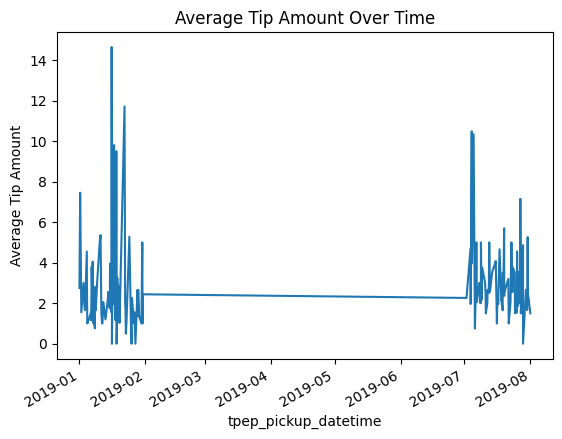

In [22]:
grouped_df = df_credit[["tpep_pickup_datetime", 'tip_amount']].groupby("tpep_pickup_datetime").mean()

# Plot the results
grouped_df.plot(y='tip_amount', legend=False)
plt.xlabel("tpep_pickup_datetime")
plt.ylabel("Average Tip Amount")
plt.title("Average Tip Amount Over Time")
plt.show()

In [28]:
# add season column for the raw data set for comparison
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"], format="%Y-%m-%d %H:%M:%S")
df["Season"] = df["tpep_pickup_datetime"].dt.month.apply(lambda x: "Winter" if x in [12, 1, 2] else "Summer")

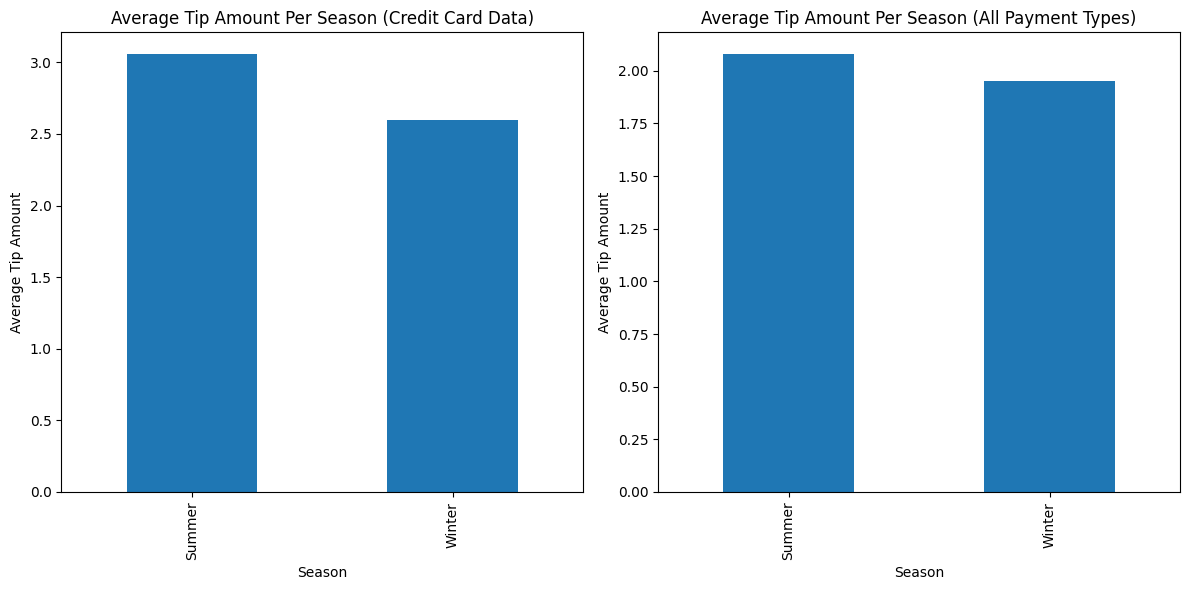

In [35]:
fig,axs = plt.subplots(1, 2, figsize=(12, 6))

# Grouping and plotting for credit card data
grouped_df_credit = df_credit.groupby("Season")['tip_amount'].mean()
grouped_df_credit.plot(kind="bar", ax=axs[0], legend=False)
axs[0].set_xlabel("Season")
axs[0].set_ylabel("Average Tip Amount")
axs[0].set_title("Average Tip Amount Per Season (Credit Card Data)")

# Grouping and plotting for all data (assuming df includes all payment types)
grouped_df = df.groupby("Season")['tip_amount'].mean()
grouped_df.plot(kind="bar", ax=axs[1], legend=False)
axs[1].set_xlabel("Season")
axs[1].set_ylabel("Average Tip Amount")
axs[1].set_title("Average Tip Amount Per Season (All Payment Types)")

plt.tight_layout()  # Adjust subplot parameters for better layout
plt.show()

As we can see, the average tip amount is very different now, by filtering the other payment types that contribute to the tip amount being 0 and thus influencing the true mean. 

Let's create a quick statistic.

In [36]:
# Summer statistics
summer_stats = df_credit[df_credit["Season"] == "Summer"]['tip_amount'].describe()
summer_mean = summer_stats['mean']
summer_mode = df_credit[df_credit["Season"] == "Summer"]["tip_amount"].mode().iloc[0]  # Mode calculation
summer_median = summer_stats['50%']  # Median from describe() output
summer_count = summer_stats['count']  # Count from describe() output

# Winter statistics
winter_stats = df_credit[df_credit["Season"] == "Winter"]['tip_amount'].describe()
winter_mean = winter_stats['mean']
winter_mode = df_credit[df_credit["Season"] == "Winter"]["tip_amount"].mode().iloc[0]  # Mode calculation
winter_median = winter_stats['50%']  # Median from describe() output
winter_count = winter_stats['count']  # Count from describe() output

# Print the results
print("Summer Descriptive Statistics:")
print(f"Mean: {summer_mean}\nMode: {summer_mode}\nMedian: {summer_median}\nSample Count: {summer_count}\n")

print("Winter Descriptive Statistics:")
print(f"Mean: {winter_mean}\nMode: {winter_mode}\nMedian: {winter_median}\nSample Count: {winter_count}")

Summer Descriptive Statistics:
Mean: 3.0564705882352943
Mode: 1.5
Median: 2.51
Sample Count: 68.0

Winter Descriptive Statistics:
Mean: 2.5992
Mode: 1.0
Median: 1.76
Sample Count: 75.0


In [37]:
# Let's check the descriptive statistic of each season in the original dataset
summer_mean = df[df["Season"] == "Summer"]['tip_amount'].mean()
summer_mode = df[df["Season"] == "Summer"]["tip_amount"].value_counts().index[0]
summer_median = df[df["Season"] == "Summer"]["tip_amount"].median()
summer_count = (df[df["Season"] == "Summer"]["tip_amount"]).count()
#For winter
winter_mean = df[df["Season"] == "Winter"]['tip_amount'].mean()
winter_mode = df[df["Season"] == "Winter"]["tip_amount"].value_counts().index[0]
winter_median = df[df["Season"] =="Winter"]["tip_amount"].median()
winter_count = (df[df["Season"] == "Winter"]["tip_amount"]).count()
print(f"Summer Descriptive Statistic:  \nMean: {summer_mean}\nMode: {summer_mode}\nMedian: {summer_median}\nSample Count: {summer_count}\nWinter Descriptive Statistic:\nMean: {winter_mean}\nMode: {winter_mode}\nMedian: {winter_median}\nSample Count: {winter_count}")

Summer Descriptive Statistic:  
Mean: 2.0784
Mode: 0.0
Median: 2.0
Sample Count: 100
Winter Descriptive Statistic:
Mean: 1.9494
Mode: 0.0
Median: 1.48
Sample Count: 100


We can see a rather change in the statistic of the two datasets. Let's see if we can have a different result to our hypothesis testing

## Using T-test for two independent
A t-test for two independent samples is used to determine whether there is a statistically significant difference between the means of two independent groups. Here are some key reasons and scenarios for using this test:

**Comparing Two Groups**: When you want to compare the means of two different groups, such as comparing the tip amounts between the "Summer" and "Winter" seasons in your dataset.

**Hypothesis Testing**: It helps in hypothesis testing where you have a null hypothesis stating that there is no difference between the two group means, and an alternative hypothesis stating that there is a difference.

**Independence of Samples**: The test is appropriate when the two samples are independent, meaning that the observations in one sample do not influence the observations in the other sample. For example, tip amounts given in the summer by different customers are independent of those given in the winter.

**Normality and Variance Assumptions**: The t-test assumes that the data is approximately normally distributed and that the variances of the two groups are equal (though there is a version of the test that adjusts for unequal variances, known as Welch's t-test).

**Simple and Effective**: It is a simple yet powerful test for comparing means when you have small to moderately sized samples.

Here, we'll use the Welch's test to determine if there is really a significant difference between the tip amounts in the Summer and Winter seasons. We also have equal samples for each season.

Here, we will make the sample size of each season equal, so that we can use the Welch's t-test. We will use a sample size of 50.

In [38]:
import scipy.stats as stats


# Sample equal-sized subsets for Summer and Winter
summer_sample = df_credit[df_credit["Season"] == "Summer"]["tip_amount"].sample(n=50, random_state=1)
winter_sample = df_credit[df_credit["Season"] == "Winter"]["tip_amount"].sample(n=50, random_state=1)

# Perform t-test
t_stat, p_value = stats.ttest_ind(summer_sample, winter_sample, equal_var=False)  # Welch's t-test due to potentially unequal variances
alpha = 0.05  # Set the significance level

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the tip amounts in Summer and Winter.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the tip amounts in Summer and Winter.")

T-statistic: -0.0029319615015579344
P-value: 0.9976682846874978
Fail to reject the null hypothesis: There is no significant difference between the tip amounts in Summer and Winter.


If the p-value from your t-test is close to 1, it suggests that there is little to no evidence to reject the null hypothesis. In the context of your test comparing tip amounts between Summer and Winter in the df_credit dataset, a p-value close to 1 typically means:

**No Significant Difference**: There is likely no statistically significant difference in tip amounts between Summer and Winter seasons based on the sample data you have analyzed.

**Fail to Reject Null Hypothesis**: The null hypothesis, which usually states that there is no difference between the groups (in this case, no difference in tip amounts between Summer and Winter), cannot be rejected based on the observed data.

Possible Reasons for a High P-value:

**Small Sample Size**: With a small sample size, the test might not have enough statistical power to detect a difference, even if one exists.

**Large Variability Within Groups**: If there is high variability (large standard deviations) in tip amounts within each season group, it can lead to a higher p-value.

**True Population Behavior**: It's possible that there genuinely is no significant difference in tip amounts between Summer and Winter seasons in the population from which your sample was drawn.

### Interpretation:

**Fail to Reject the Null Hypothesis**: When the p-value is greater than αα, it indicates that any observed difference in the sample means could be due to random chance rather than a true difference in the population means.

**Conclusion**: We do not have enough evidence to say that there is a significant difference between the two groups. Hence, there is no evidence to suggest that yellow taxi passengers in New York City tip drivers more in the winter or summer.